### Connecting google drive a a working directory

National Grid Dataset

https://drive.google.com/drive/folders/1qcD9tq4yeNSzAQp5Pi_GeHRSJ9n9u78u?usp=sharing

*Download the dataset and store it in any folder inside the google drive*

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing the libraries pandas, Numpy and matplotlib**


> pandas for handling tabular datasets


> Numpy for performing math operations and handling datastructures of array format.


> matplotlib for plotting graphs and visualization 






### importing the data and analysing 

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

**Getting the values for month and year**

In [12]:
YEAR = int(input('Enter the year for finding the Dataset ---> '))
MONTH = int(input('Enter the month for finding the Dataset---> '))

Enter the year for finding the Dataset ---> 2021
Enter the month for finding the Dataset---> 09


**location of the dataset**

click the folder icon on the left side of the colab notebook. Go to drive to locate your file and get the path of the national grid data locaated in the drive and paste it hear upto the folder which contains the file. the link given here is **f'/content/drive/MyDrive/DATASETS/fNew {YEAR} {MONTH}.csv'**. copy the link and paste it till the **DATASETS/**

In [14]:
dataset = f'/content/drive/MyDrive/DATASETS/fNew {YEAR} {MONTH}.csv'

**Reading the dataset from the format .csv**

In [15]:
df = pd.read_csv(dataset)

**Splitting data and time in a seperate column**

In [16]:
df[['Date','time']] = df.dtm.str.split(" ",expand=True,)

In [17]:
df[['YEAR','MONTH', 'DATE']] = df.Date.str.split("-",expand=True,)
df[['HOURS','MINUTES', 'SECONDS']] = df.time.str.split(":",expand=True,)

In [18]:
df

,dtm,f,Date,time,YEAR,MONTH,DATE,HOURS,MINUTES,SECONDS
0,2021-09-01 00:00:00,49.923,2021-09-01,00:00:00,2021,09,01,00,00,00
1,2021-09-01 00:00:01,49.916,2021-09-01,00:00:01,2021,09,01,00,00,01
2,2021-09-01 00:00:02,49.908,2021-09-01,00:00:02,2021,09,01,00,00,02
3,2021-09-01 00:00:03,49.901,2021-09-01,00:00:03,2021,09,01,00,00,03
4,2021-09-01 00:00:04,49.899,2021-09-01,00:00:04,2021,09,01,00,00,04
...,...,...,...,...,...,...,...,...,...,...
2591995,2021-09-30 23:59:55,50.052,2021-09-30,23:59:55,2021,09,30,23,59,55
2591996,2021-09-30 23:59:56,50.050,2021-09-30,23:59:56,2021,09,30,23,59,56
2591997,2021-09-30 23:59:57,50.046,2021-09-30,23:59:57,2021,09,30,23,59,57
2591998,2021-09-30 23:59:58,50.044,2021-09-30,23:59:58,2021,09,30,23,59,58


**Rearranging the dataset in an order**

In [19]:
df = df[['DATE', 'MONTH', 'YEAR', 'HOURS', 'MINUTES', 'SECONDS', 'f']]

In [20]:
df

,DATE,MONTH,YEAR,HOURS,MINUTES,SECONDS,f
0,01,09,2021,00,00,00,49.923
1,01,09,2021,00,00,01,49.916
2,01,09,2021,00,00,02,49.908
3,01,09,2021,00,00,03,49.901
4,01,09,2021,00,00,04,49.899
...,...,...,...,...,...,...,...
2591995,30,09,2021,23,59,55,50.052
2591996,30,09,2021,23,59,56,50.050
2591997,30,09,2021,23,59,57,50.046
2591998,30,09,2021,23,59,58,50.044


### Inference of data for ARIMA


**Since it is an ARIMA dataset, the rolling mean and standard deviation is calculated and plotted against the true dataset**

In [21]:
rolmean = df.rolling(window=60).mean()
rolstd = df.rolling(window=12).std()

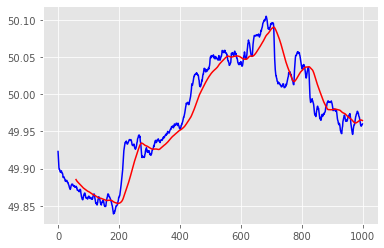

In [22]:
plt.style.use('ggplot')
plt.plot(df[['f']].head(1000), color='blue')
plt.plot(rolmean[['f']].head(1000), color='red')
# plt.plot(rolstd[['f']].head(5000), color='blue')

In [23]:
from statsmodels.tsa.stattools import adfuller
import pandas.util.testing as tm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Dickey–Fuller test**

To keep it simple the p-value should be less than 1.

In [24]:
dftest = adfuller(df['f'].head(1000), autolag = 'AIC')
dfoutput = pd.Series(dftest[0:4], index = ['Test statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
  dfoutput['Critical Value (%s)'%key] = value

print(dfoutput)


Test statistic                  -1.387325
p-value                          0.588337
#Lags Used                       4.000000
Number of Observations Used    995.000000
Critical Value (1%)             -3.436939
Critical Value (5%)             -2.864449
Critical Value (10%)            -2.568319
dtype: float64


In [25]:
df_logscale = np.log(df['f'].head(3600))

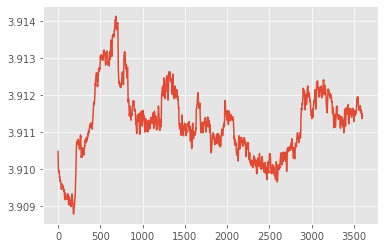

In [26]:
plt.plot(df_logscale)
# plt.plot(df[['f']].head(1000), color='blue')
# plt.plot(rolmean[['f']].head(1000), color='red')
rolmean = df_logscale.rolling(window=60).mean()
rolstd = df_logscale.rolling(window=12).std()

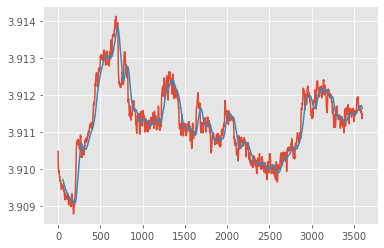

In [27]:
plt.plot(df_logscale)
plt.plot(rolmean)

In [28]:
df_cos = np.cos(df['f'].tail(100))

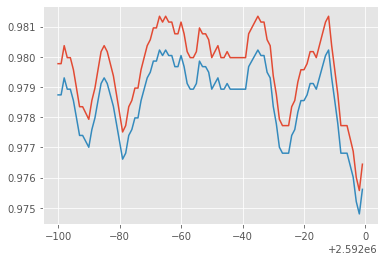

In [29]:
plt.plot(df_cos)
plt.plot(np.exp(df_cos)-1.7199*(df_cos))

In [30]:
X = df
X

,DATE,MONTH,YEAR,HOURS,MINUTES,SECONDS,f
0,01,09,2021,00,00,00,49.923
1,01,09,2021,00,00,01,49.916
2,01,09,2021,00,00,02,49.908
3,01,09,2021,00,00,03,49.901
4,01,09,2021,00,00,04,49.899
...,...,...,...,...,...,...,...
2591995,30,09,2021,23,59,55,50.052
2591996,30,09,2021,23,59,56,50.050
2591997,30,09,2021,23,59,57,50.046
2591998,30,09,2021,23,59,58,50.044


**Scaling the frequency data to the value below 1 so that the mean absolute error is more easily interpreted as a fraction of the maximum demand.**

In [31]:
y = df['f']/df['f'].max()

**Maximum value of the frequency**

In [32]:
df['f'].max()

50.322

**removing the frequency value from the dataset and storing it a seperate variable so as to determine the future trends of the values using ML** 

In [33]:
X = df[['DATE', 'MONTH', 'YEAR', 'HOURS', 'MINUTES', 'SECONDS']]

In [34]:
X

,DATE,MONTH,YEAR,HOURS,MINUTES,SECONDS
0,01,09,2021,00,00,00
1,01,09,2021,00,00,01
2,01,09,2021,00,00,02
3,01,09,2021,00,00,03
4,01,09,2021,00,00,04
...,...,...,...,...,...,...
2591995,30,09,2021,23,59,55
2591996,30,09,2021,23,59,56
2591997,30,09,2021,23,59,57
2591998,30,09,2021,23,59,58


**Scaled frequency values**

In [35]:
y

0          0.992071
1          0.991932
2          0.991773
3          0.991634
4          0.991594
             ...   
2591995    0.994635
2591996    0.994595
2591997    0.994515
2591998    0.994476
2591999    0.994555
Name: f, Length: 2592000, dtype: float64

In [36]:
from sklearn.model_selection import TimeSeriesSplit

ts_cv = TimeSeriesSplit(
    n_splits=5,
    gap=48,
    max_train_size=10000,
    test_size=1000,
)

In [37]:
X

,DATE,MONTH,YEAR,HOURS,MINUTES,SECONDS
0,01,09,2021,00,00,00
1,01,09,2021,00,00,01
2,01,09,2021,00,00,02
3,01,09,2021,00,00,03
4,01,09,2021,00,00,04
...,...,...,...,...,...,...
2591995,30,09,2021,23,59,55
2591996,30,09,2021,23,59,56
2591997,30,09,2021,23,59,57
2591998,30,09,2021,23,59,58


In [38]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import cross_validate


categorical_columns = [
]
categories = [
]
ordinal_encoder = OrdinalEncoder(categories=categories)


gbrt_pipeline = make_pipeline(
    ColumnTransformer(
        transformers=[
            ("categorical", ordinal_encoder, categorical_columns),
        ],
        remainder="passthrough",
    ),
    HistGradientBoostingRegressor(
        categorical_features=range(4),
    ),
)

**Model evaluation for Machine Learning**

In [39]:
def evaluate(model, X, y, cv):
    cv_results = cross_validate(
        model,
        X,
        y,
        cv=cv,
        scoring=["neg_mean_absolute_error", "neg_root_mean_squared_error"],
    )
    mae = -cv_results["test_neg_mean_absolute_error"]
    rmse = -cv_results["test_neg_root_mean_squared_error"]
    print(
        f"Mean Absolute Error:     {mae.mean():.3f} +/- {mae.std():.3f}\n"
        f"Root Mean Squared Error: {rmse.mean():.3f} +/- {rmse.std():.3f}"
    )


### An approoch to predict the future data

**Importing Sklearn libraries for performing ML**

In [40]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import RidgeCV
import numpy as np
from sklearn import *
from sklearn.kernel_approximation import Nystroem

**Model Creation :- One hot encorder algorithm definition**


In [41]:
one_hot_encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)
alphas = np.logspace(-6, 6, 5)
naive_linear_pipeline = make_pipeline(
    ColumnTransformer(
        transformers=[
            ("categorical", one_hot_encoder, categorical_columns),
        ],
        remainder=MinMaxScaler(),
    ),
    RidgeCV(alphas=alphas),
)


**Model Creation :- One hot linear encorder algorithm **

In [42]:
one_hot_linear_pipeline = make_pipeline(
    ColumnTransformer(
        transformers=[
            ("categorical", one_hot_encoder, categorical_columns),
            ("one_hot_time", one_hot_encoder, ["YEAR", "MONTH", "HOURS", "MINUTES", "SECONDS"]),
        ],
        remainder=MinMaxScaler(),
    ),
    RidgeCV(alphas=alphas),
)

evaluate(one_hot_linear_pipeline, X, y, cv=ts_cv)

Mean Absolute Error:     0.001 +/- 0.001
Root Mean Squared Error: 0.001 +/- 0.001


**Model Creation :- One hot polynomial encorder algorithm **

In [43]:
one_hot_poly_pipeline = make_pipeline(
    ColumnTransformer(
        transformers=[
            ("categorical", one_hot_encoder, categorical_columns),
            ("one_hot_time", one_hot_encoder, ["YEAR", "MONTH", "HOURS", "MINUTES", "SECONDS"]),
        ],
        remainder="passthrough",
    ),
    Nystroem(kernel="poly", degree=2, n_components=75, random_state=0),
    RidgeCV(alphas=alphas),
)
evaluate(one_hot_poly_pipeline, X, y, cv=ts_cv)

Mean Absolute Error:     0.001 +/- 0.000
Root Mean Squared Error: 0.001 +/- 0.000


**Splitting the training and testing dataset for performing ML**

In [44]:
all_splits = list(ts_cv.split(X, y))
train_0, test_0 = all_splits[0]

In [45]:
X.iloc[test_0]

,DATE,MONTH,YEAR,HOURS,MINUTES,SECONDS
2587000,30,09,2021,22,36,40
2587001,30,09,2021,22,36,41
2587002,30,09,2021,22,36,42
2587003,30,09,2021,22,36,43
2587004,30,09,2021,22,36,44
...,...,...,...,...,...,...
2587995,30,09,2021,22,53,15
2587996,30,09,2021,22,53,16
2587997,30,09,2021,22,53,17
2587998,30,09,2021,22,53,18


In [46]:
train_4, test_4 = all_splits[4]

**predicting the test results for one hot linear encorder model** 


In [47]:
one_hot_linear_pipeline.fit(X.iloc[train_0], y.iloc[train_0])
one_hot_linear_predictions = one_hot_linear_pipeline.predict(X.iloc[test_0])

**predicting the test results for one hot polynomial encorder model** 


In [48]:
one_hot_poly_pipeline.fit(X.iloc[train_0], y.iloc[train_0])
one_hot_poly_predictions = one_hot_poly_pipeline.predict(X.iloc[test_0])

In [49]:
X.iloc[test_0]

,DATE,MONTH,YEAR,HOURS,MINUTES,SECONDS
2587000,30,09,2021,22,36,40
2587001,30,09,2021,22,36,41
2587002,30,09,2021,22,36,42
2587003,30,09,2021,22,36,43
2587004,30,09,2021,22,36,44
...,...,...,...,...,...,...
2587995,30,09,2021,22,53,15
2587996,30,09,2021,22,53,16
2587997,30,09,2021,22,53,17
2587998,30,09,2021,22,53,18


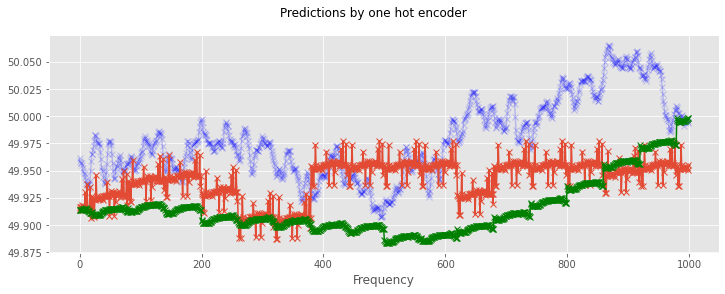

In [56]:
last_hours = slice(-1000, None)
fig, ax = plt.subplots(figsize=(12, 4))
fig.suptitle("Predictions by one hot encoder")
plt.xlabel("Seconds")
plt.xlabel("Frequency")
ax.plot(
    y.iloc[test_0].values[last_hours]*50.258,
    "x-",
    alpha=0.2,
    label="Actual demand",
    color="blue",
)
ax.plot(
    one_hot_poly_predictions[last_hours]*50.303,
    "x-",
    label="One-hot + polynomial kernel",
)
ax.plot(
    one_hot_linear_predictions[last_hours]*50.303,
    "x-",
    label="One-hot + polynomial kernel",
    color="green"
)

In the above graph, the blue color is the original dataset and green and red are the predicted frequencies.

Further tuining is required to perfectly fit the model.

In [51]:
from sklearn.metrics import accuracy_score

In [52]:
df['f']

0          49.923
1          49.916
2          49.908
3          49.901
4          49.899
            ...  
2591995    50.052
2591996    50.050
2591997    50.046
2591998    50.044
2591999    50.048
Name: f, Length: 2592000, dtype: float64

In [53]:
df['failure_1'] = df['f'].apply(lambda x: 1 if (x>=50.015 and x<50.1) else 0)
df['failure_2'] = df['f'].apply(lambda x: 1 if (x>=50.1 and x<50.2) else 0)
df['failure_3'] = df['f'].apply(lambda x: 1 if (x>=50.2 and x<50.3) else 0)
df['failure_4'] = df['f'].apply(lambda x: 1 if (x>=50.3 and x<50.4) else 0)
df['failure_0'] = df['f'].apply(lambda x: 1 if (x>=50.4 and x<50.5) else 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### case 1: 50.1 < X >= 50.015 Hz



In [ ]:
df['failure_1'].sum()

1003989

### case 2: 50.2 < X >= 50.1 Hz

In [ ]:
df['failure_2'].sum()

156381

### case 3: 50.2 < X >= 50.3 Hz

In [ ]:
df['failure_3'].sum()

723

### case 4: 50.3 < X >= 50.4 Hz

In [ ]:
df['failure_4'].sum()

0

### case 5: 50.3 < X >= 50.4 Hz

In [ ]:
df['failure_0'].sum()

0

In [ ]:
df['failure_5'] = df['f'].apply(lambda x: 1 if (x<=49.985 and x>49.9) else 0)
df['failure_6'] = df['f'].apply(lambda x: 1 if (x<=49.9 and x>49.8) else 0)
df['failure_7'] = df['f'].apply(lambda x: 1 if (x<=49.8 and x>49.7) else 0)
df['failure_8'] = df['f'].apply(lambda x: 1 if (x<=49.7 and x>49.6) else 0)
df['failure_9'] = df['f'].apply(lambda x: 1 if (x<=49.6 and x>49.5) else 0)

### case 1*: 49.985 < X >= 49.9 Hz

In [ ]:
df['failure_5'].sum()


906302

### case 2*: 49.9 < X >= 49.8 Hz

In [ ]:
df['failure_6'].sum()

164295

### case 3*: 49.8 < X >= 49.7 Hz

In [ ]:
df['failure_7'].sum()

1737

### case 4*: 49.7 < X >= 49.6 Hz


In [ ]:
df['failure_8'].sum()

2

### case 5*: 49.6 < X >= 49.5 Hz

In [ ]:
df['failure_9'].sum()

0